In [1]:
###### Applications Lab #1-- ATOC7500 Objective Analysis
##### Originally coded by Prof. Jennifer Kay (CU) with input from Elizabeth Maroon (CU ATOC/CIRES Postdoc 2018)
###### last updated January 29, 2019

###LEARNING GOALS:
###1) Working in an ipython notebook: read in netcdf file, make line plots and histograms
###2) Calculate statistical significance of the changes in the normalized mean using a z-statistic and a t-statistic
###3) Calculate confidence intervals on CESM-LE global warming using z-statistic and t-statistic

# Import the packages and general set-up
%matplotlib inline  
# this enables plotting within notebook
import matplotlib   # library for plotting
import matplotlib.pyplot as plt # basic plotting; later you will type plt.$COMMAND
import numpy as np # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html  
import xarray  ##netcdf manipulation - slick array manipulation

In [2]:
## LEARNING GOAL #1
## Read in the data from netcdf files
## These data are global annual mean surface temperatures from the CESM Large Ensemble Project.
fname="TS_timeseries_cesmle_1920_2100.nc"
ds=xarray.open_dataset(fname)
#ds  ## note: uncommenting this line prints information about the data you read in
fname1="TS_timeseries_cesmle_1850.nc"
ds1=xarray.open_dataset(fname1)
gts=ds["gts_ann_allcesmle"]
ats=ds["ats_ann_allcesmle"]
year=ds["year"]
#gts  ## note: uncommenting this line prints information about the variable gts
gts_1850=ds1["gts_annual"]

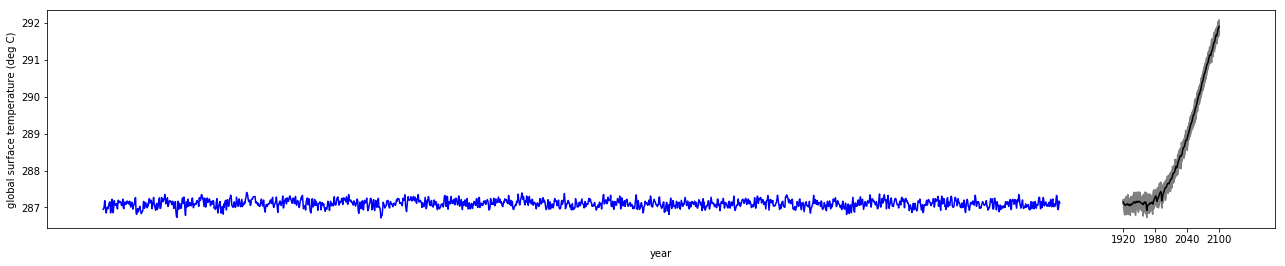

In [3]:
## It's always a good idea to plot your data before you start doing any calculations.  "Look at your data"!
## Let's make a line plot of global annual mean temperature timeseries from the 1850 control and the ensemble members.
plt.rcParams["figure.figsize"] = [22,4]
[plt.plot(year,gts.sel(member=i),color="grey") for i in range(1,31)] ## plot all ensemble members
plt.plot(year,gts.mean("member"),color="black")  ## plot ensemble mean
plt.xlabel('year')
plt.ylabel('global surface temperature (deg C)')
plt.xticks(np.arange(1920,2101,60),["1920","1980","2040","2100"])

plt.plot(gts_1850,color="blue");  ## add ";" to not print to screen plotting comments

Mean 1850 global mean surface temperature
287.1053161621094
Standard deviation in 1850 global mean surface temperature:
0.10361006110906601
Normalized mean and std in 1850 global mean surface temperature:
-0.0006913001803770772
0.9999991094526368


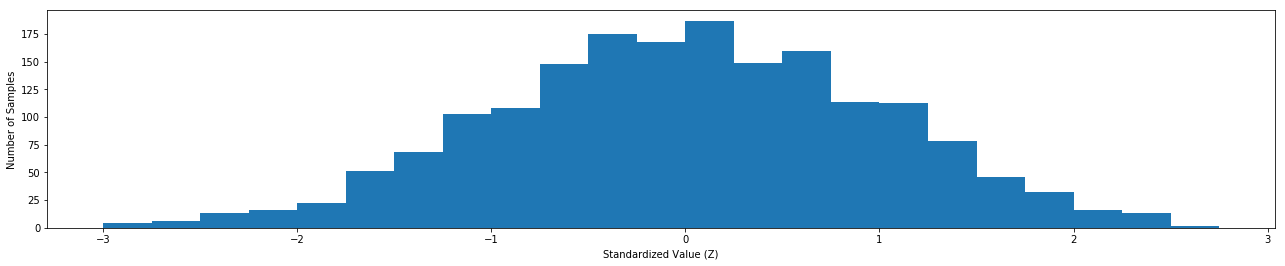

In [4]:
## LEARNING GOAL #2 - Assess global warming in the ensemble and compare it to the 1850 control with constant forcing

#### With the 1850 control we have the opportunity to calculate population statistics with constant forcing.
#### Let's find the population mean and population standard deviation from the 1850 control.  
gts_1850_mean=np.mean(gts_1850)
gts_1850_std=np.std(gts_1850)
print("Mean 1850 global mean surface temperature")
print(gts_1850_mean.values)
print("Standard deviation in 1850 global mean surface temperature:")
print(gts_1850_std.values)

#### Normalize the data and plot a histogram
gts_1850_norm=(gts_1850-gts_1850_mean)/gts_1850_std
gts_1850_norm_mean=np.mean(gts_1850_norm).values
gts_1850_norm_std=np.std(gts_1850_norm).values
print("Normalized mean and std in 1850 global mean surface temperature:")
print(gts_1850_norm_mean)
print(gts_1850_norm_std)

### note that the code below did not work on the classroom computers in 2018 but is retained here for reference
#xinc = np.arange(-3,3,.25)
#hx=np.histogram(gts_1850_norm,xinc)
#plt.rcParams["figure.figsize"] = [5,5]
#plt.bar(hx[1][:-1],hx[0],edgecolor = 'r', color = [], width = .25, linewidth = 2)
#plt.ylabel('Number of Samples')
#plt.xlabel('Standardized Value (Z)')

### this code does work on the classroom computers
xinc = np.arange(-3,3,.25);
plt.hist(gts_1850_norm,xinc);
plt.ylabel('Number of Samples');
plt.xlabel('Standardized Value (Z)');

10
<xarray.DataArray 'gts_ann_allcesmle' (year: 10)>
array([ 288.14679 ,  288.187134,  288.274872,  288.225159,  288.332031,
        288.286438,  288.099854,  288.30484 ,  288.404846,  288.377197])
Coordinates:
    member   int32 1
  * year     (year) int32 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
Attributes:
    NCL:             month_to_annual
    cell_methods:    time: mean
    long_name:       Surface temperature (radiative)
    units:           K
    average_op_ncl:  dim_avg over dimension(s): lon
Normalized mean CESM LE member:
11.182310299923625



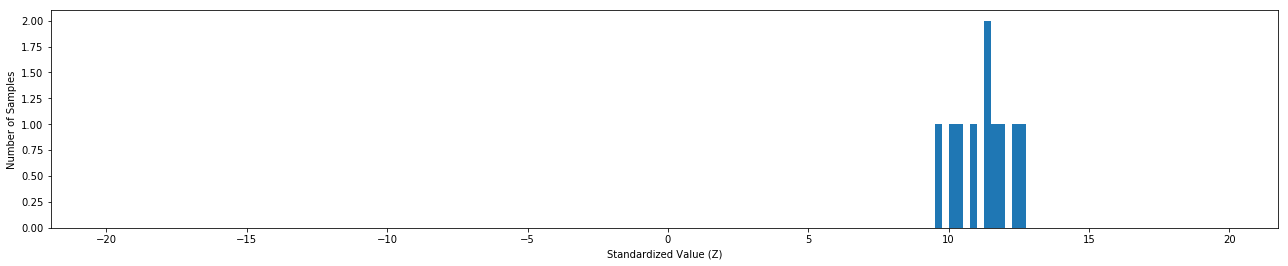

In [8]:
### Next let's calculate the global warming in the first ensemble member over a given time period.
### Our end goal is compare this warming to the 1850 control run and assess if the warming is statistically significant.

### Start by normalizing member 1 data using 1850 control mean and standard deviation
startyear=2020
endyear=2030
nyrs=(endyear-startyear)
print(nyrs)
gts_mem1=gts.sel(member=1).sel(year=slice(startyear,endyear-1))
print(gts_mem1)
gts_mem1_norm=(gts_mem1-gts_1850_mean)/gts_1850_std
print("Normalized mean CESM LE member:")
print(np.mean(gts_mem1_norm).values)
print("")

## plot a histogram to see the range of values
### note that the code below did not work on the classroom computers but did work on Jen's computer
#xinc = np.arange(-10,10,.25)
#hx=np.histogram(gts_mem1_norm,xinc)
#plt.bar(hx[1][:-1],hx[0],edgecolor = 'r', color = [], width = .25, linewidth = 2)

### this code does work on the classroom computers
xinc = np.arange(-20,20,.25)
plt.hist(gts_mem1_norm,xinc)
plt.ylabel('Number of Samples')
plt.xlabel('Standardized Value (Z)')

In [9]:
## What is the probability that the mean annual global mean temperature was X assuming no global warming?
## Test sample mean is equal to the population mean (null hypothesis)
## Assume that the Global Mean Annual Temperature is standard normal. 

## Using Barnes equation (89) on page 16 to calculate probability using z-statistic
sample_mean=np.mean(gts_mem1_norm).values
print('sample_mean:',sample_mean)
population_mean=gts_1850_norm_mean
population_std=gts_1850_norm_std
xstd=population_std/np.sqrt(nyrs)
z=(sample_mean-population_mean)/xstd
print("Z-statistic:")
print(z)
print("Probability (percent):")
print((1-stats.norm.cdf(z))*100)

## Using Barnes equation (102) to calculate probability using the t-statistic
sample_mean=np.mean(gts_mem1_norm).values
sample_std=np.std(gts_mem1_norm).values
print("T-statistic:")
t=(sample_mean-population_mean)/(sample_std/(np.sqrt(nyrs-1)))
print(t)
print("Probability (percent):")
print((1-stats.t.cdf(t,nyrs-1))*100)

sample_mean: 11.182310299923625
Z-statistic:
35.3637876268
Probability (percent):
0.0
T-statistic:
37.1244411374
Probability (percent):
1.85069737313e-09


In [10]:
### LEARNING GOAL #3 - Calculate confidence intervals on CESM-LE global warming using z-statistic and t-statistic

### Use the code below to calculate how much global warming occurred over the 21st century in both 
### individual ensemble members and the ensemble mean.

## Compare 21st century global warming: one member vs. ensemble mean
gw_mem1=gts.sel(member=1).sel(year=slice(2080,2100)).mean("year")- \
        gts.sel(member=1).sel(year=slice(2000,2020)).mean("year")
gw_mean=(gts.sel(year=slice(2080,2100)).mean("year").mean("member"))- \
        (gts.sel(year=slice(2000,2020)).mean("year").mean("member"))
print(gw_mem1.values)
print(gw_mean.values)

3.695177350725487
3.6333599272226706


In [11]:
## Next - let's calculate emsemble statistics about 21st century global warming
nmembers=30
temp=(gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")-\
      gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year"))
gw_mean_mem=temp.mean("member")
gw_std_mem=temp.std("member")
gw_min_mem=temp.min("member")
gw_max_mem=temp.max("member")
print(gw_mean_mem.values)
print(gw_std_mem.values)
print(gw_min_mem.values)
print(gw_max_mem.values)

3.6333599272228487
0.06270798785616691
3.5054553803943236
3.7549641927083712


In [12]:
### Let's add confidence intervals to the estimated global warming
### Specifically - we'll compare confidence intervals calculated using t-statistic and z-statistic

#### Calculate the 95% and 99% confidence limits on the 21st century warming using t-statistic
#### Assume that the global warming is normally distributed.
N=nmembers
df=N-1

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
tstat95=stats.t.ppf(0.975,df)
low_limit95=gw_mean_mem-tstat95*(gw_std_mem/np.sqrt(nmembers-1))
high_limit95=gw_mean_mem+tstat95*(gw_std_mem/np.sqrt(nmembers-1))
print("95% confidence limits - t-statistic")
print(low_limit95.values)
print(high_limit95.values)

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
tstat99=stats.t.ppf(0.995,df)
low_limit99=gw_mean_mem-tstat99*(gw_std_mem/np.sqrt(nmembers-1))
high_limit99=gw_mean_mem+tstat99*(gw_std_mem/np.sqrt(nmembers-1))
print("99% confidence limits - t-statistic")
print(low_limit99.values)
print(high_limit99.values)

#### Calculate the 95% and 99% confidence limits on the 21st century warming using z-statistic
#### Assume that the global warming is normally distributed.

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
zstat95=stats.norm.ppf(0.975)
low_limit95=gw_mean_mem-zstat95*(gw_std_mem/np.sqrt(nmembers))
high_limit95=gw_mean_mem+zstat95*(gw_std_mem/np.sqrt(nmembers))
print("95% confidence limits - z-statistic")
print(low_limit95.values)
print(high_limit95.values)

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
zstat99=stats.norm.ppf(0.995)
low_limit99=gw_mean_mem-zstat99*(gw_std_mem/np.sqrt(nmembers))
high_limit99=gw_mean_mem+zstat99*(gw_std_mem/np.sqrt(nmembers))
print("99% confidence limits - z-statistic")
print(low_limit99.values)
print(high_limit99.values)

95% confidence limits - t-statistic
3.609544084968213
3.6571757694774845
99% confidence limits - t-statistic
3.601262968269007
3.6654568861766905
95% confidence limits - z-statistic
3.6109205742955406
3.655799280150157
99% confidence limits - z-statistic
3.603869618585162
3.6628502358605353


[ 3.69517735  3.63697452  3.65285092  3.64413452  3.63463193  3.56751796
  3.66064744  3.72673398  3.50545538  3.68349493  3.55040632  3.52130127
  3.5517767   3.68594651  3.61999512  3.72776867  3.62863159  3.54148356
  3.57334101  3.57070196  3.67618379  3.614252    3.61848232  3.69611613
  3.61500767  3.66699509  3.62252953  3.68835013  3.75496419  3.66894531]


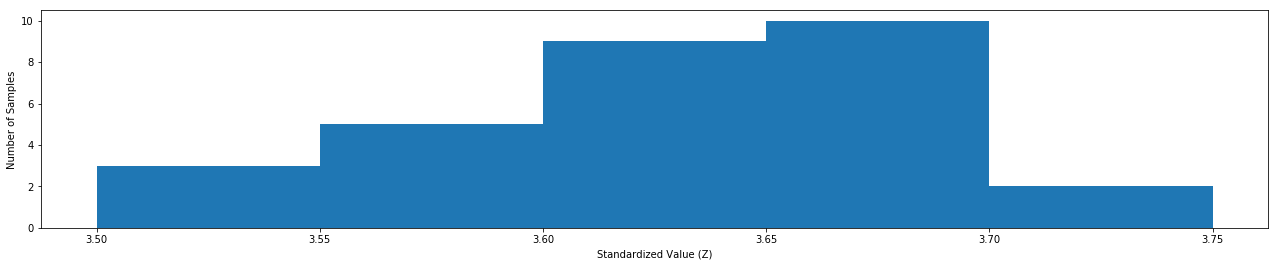

In [10]:
#### plot a histogram of global warming - Was normal distribution a good approximation?
gw_allmem=gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")- \
        gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year")
print(gw_allmem.values)

## plot a histogram to see the range of values
### note that the code below did not work on the classroom computers but did work on Jen's computer
#xinc = np.arange(3.5,3.8,.05)
#print(xinc)
#hx=np.histogram(gw_allmem,xinc)
#plt.bar(hx[1][:-1],hx[0],edgecolor = 'r', color = [], width = .05, linewidth = 2);
### this code does work on the classroom computers
xinc = np.arange(3.5,3.8,.05)
plt.hist(gw_allmem,xinc);
plt.ylabel('Number of Samples');
plt.xlabel('Standardized Value (Z)');

In [14]:
#### What if you you only had 6 ensemble members?  Estimate your confidence interval using a t-statistic.
## Calculate statistics for the 21st century global warming
nmembers=6
temp=(gts.sel(member=slice(1,nmembers)).sel(year=slice(2080,2100)).mean("year")-\
      gts.sel(member=slice(1,nmembers)).sel(year=slice(2000,2020)).mean("year"))
print(temp)
gw_mean_mem=temp.mean("member")
gw_std_mem=temp.std("member")
gw_min_mem=temp.min("member")
gw_max_mem=temp.max("member")
print(gw_mean_mem.values)
print(gw_std_mem.values)
print(gw_min_mem.values)
print(gw_max_mem.values)

<xarray.DataArray 'gts_ann_allcesmle' (member: 6)>
array([ 3.695177,  3.636975,  3.652851,  3.644135,  3.634632,  3.567518])
Coordinates:
  * member   (member) int32 1 2 3 4 5 6
3.638547867063503
0.037651347891082064
3.56751796177457
3.695177350725487


In [12]:
#### Calculate the 95% and 99% confidence limits on the 21st century warming using t-statistic
#### Assume that the global warming is normally distributed.  (See page 18 of Barnes notes)
N=nmembers
df=N-1

## Note: Python calculates left/lower-tail probabilities by default, so for the 95% confidence interval, use 0.975
tstat95=stats.t.ppf(0.975,df)
low_limit95=gw_mean_mem-tstat95*(gw_std_mem/np.sqrt(nmembers-1))
high_limit95=gw_mean_mem+tstat95*(gw_std_mem/np.sqrt(nmembers-1))
print("95% confidence limits - t-statistic")
print(low_limit95.values)
print(high_limit95.values)

## Note: Python calculates left/lower-tail probabilities by default, so for the 99% confidence interval, use 0.995
tstat99=stats.norm.ppf(0.995,df)
low_limit99=gw_mean_mem-tstat99*(gw_std_mem/np.sqrt(nmembers-1))
high_limit99=gw_mean_mem+tstat99*(gw_std_mem/np.sqrt(nmembers-1))
print("99% confidence limits - t-statistic")
print(low_limit99.values)
print(high_limit99.values)

95% confidence limits - t-statistic
3.600657509101211
3.6827523880607975
99% confidence limits - t-statistic
3.5207329606764337
3.7626769364855748
